In [1]:
# Standard imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistics packages
import pylab
from pylab import rcParams
import statsmodels.api as sm
import statistics
from scipy import stats

# Scikit-learn
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

# Import chisquare from SciPy.stats
from scipy.stats import chisquare
from scipy.stats import chi2_contingency

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset into Pandas dataframe
medical_df = pd.read_csv('medical_clean.csv')

In [3]:
# Rename survey columns to more identifiable names
medical_df.rename(columns = 
    {'Item1':'Survey_TimelyAdmin',
     'Item2':'Survey_TimelyTreatment',
     'Item3':'Survey_TimelyVisits',
     'Item4':'Survey_Reliability',
     'Item5':'Survey_Options',
     'Item6':'Survey_HoursTreatment',
     'Item7':'Survey_CourteousStaff',
     'Item8':'Survey_ActiveListening'}, inplace=True)

# Display updated Medical dataframe
medical_df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Survey_TimelyAdmin,Survey_TimelyTreatment,Survey_TimelyVisits,Survey_Reliability,Survey_Options,Survey_HoursTreatment,Survey_CourteousStaff,Survey_ActiveListening
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,...,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9996,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,...,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9997,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,...,8276.481000,15281.210000,3,3,3,4,4,2,3,2
9998,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01590,...,7644.483000,7781.678000,5,5,3,4,4,3,4,3


In [4]:
# List dataframe columns
df = medical_df.columns
print(df)

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'Survey_TimelyAdmin',
       'Survey_TimelyTreatment', 'Survey_TimelyVisits', 'Survey_Reliability',
       'Survey_Options', 'Survey_HoursTreatment', 'Survey_CourteousStaff',
       'Survey_ActiveListening'],
      dtype='object')


In [5]:
# Number of records and columns of dataframe
medical_df.shape

(10000, 50)

In [6]:
# Describe Medical dataset stats
medical_df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Survey_TimelyAdmin,Survey_TimelyTreatment,Survey_TimelyVisits,Survey_Reliability,Survey_Options,Survey_HoursTreatment,Survey_CourteousStaff,Survey_ActiveListening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [7]:
# Remove less relevant fields from stats description
medical_df = medical_df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 
                                      'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 
                                      'Marital'])
medical_df.describe()
medical_df.shape

(10000, 35)

In [8]:
# Count of missing values by column
data_nulls = medical_df.isnull().sum()
print(data_nulls)

Children                  0
Age                       0
Income                    0
Gender                    0
ReAdmis                   0
VitD_levels               0
Doc_visits                0
Full_meals_eaten          0
vitD_supp                 0
Soft_drink                0
Initial_admin             0
HighBlood                 0
Stroke                    0
Complication_risk         0
Overweight                0
Arthritis                 0
Diabetes                  0
Hyperlipidemia            0
BackPain                  0
Anxiety                   0
Allergic_rhinitis         0
Reflux_esophagitis        0
Asthma                    0
Services                  0
Initial_days              0
TotalCharge               0
Additional_charges        0
Survey_TimelyAdmin        0
Survey_TimelyTreatment    0
Survey_TimelyVisits       0
Survey_Reliability        0
Survey_Options            0
Survey_HoursTreatment     0
Survey_CourteousStaff     0
Survey_ActiveListening    0
dtype: int64


In [9]:
# Impute qualitive data fields by creating binary dummy columns then drop pre-existing column
# Exclude redundant values: ex. gender is categorized as male or female, the value 'prefer not to answer' can be identified by both male and female being zero
dmy = pd.get_dummies(medical_df['Gender'])
dmy = dmy.iloc[:,:-1]
medical_df = pd.concat([medical_df,dmy],axis=1)
medical_df = medical_df.drop(columns = 'Gender')

dmy = pd.get_dummies(medical_df['Initial_admin'])
medical_df = pd.concat([medical_df,dmy],axis=1)
medical_df = medical_df.drop(columns = 'Initial_admin')

dmy = pd.get_dummies(medical_df['Complication_risk'])
medical_df = pd.concat([medical_df,dmy],axis=1)
medical_df = medical_df.drop(columns = 'Complication_risk')

dmy = pd.get_dummies(medical_df['Services'])
medical_df = pd.concat([medical_df,dmy],axis=1)
medical_df = medical_df.drop(columns = 'Services')

medical_df.describe()

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,...,Elective Admission,Emergency Admission,Observation Admission,High,Low,Medium,Blood Work,CT Scan,Intravenous,MRI
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.097200,53.511700,40490.495160,17.964262,5.012200,1.001400,0.398900,34.455299,5312.172769,12934.528587,...,0.250400,0.506000,0.243600,0.335800,0.212500,0.451700,0.526500,0.122500,0.313000,0.038000
std,2.163659,20.638538,28521.153293,2.017231,1.045734,1.008117,0.628505,26.309341,2180.393838,6542.601544,...,0.433265,0.499989,0.429276,0.472293,0.409097,0.497687,0.499322,0.327879,0.463738,0.191206
min,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,0.000000,1.001981,1938.312067,3125.703000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,0.000000,7.896215,3179.374015,7986.487755,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,53.000000,33768.420000,17.951122,5.000000,1.000000,0.000000,35.836244,5213.952000,11573.977735,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,71.000000,54296.402500,19.347963,6.000000,2.000000,1.000000,61.161020,7459.699750,15626.490000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,10.000000,89.000000,207249.100000,26.394449,9.000000,7.000000,5.000000,71.981490,9180.728000,30566.070000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df = medical_df.columns
print(df)

Index(['Children', 'Age', 'Income', 'ReAdmis', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'HighBlood', 'Stroke',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Initial_days', 'TotalCharge', 'Additional_charges',
       'Survey_TimelyAdmin', 'Survey_TimelyTreatment', 'Survey_TimelyVisits',
       'Survey_Reliability', 'Survey_Options', 'Survey_HoursTreatment',
       'Survey_CourteousStaff', 'Survey_ActiveListening', 'Female', 'Male',
       'Elective Admission', 'Emergency Admission', 'Observation Admission',
       'High', 'Low', 'Medium', 'Blood Work', 'CT Scan', 'Intravenous', 'MRI'],
      dtype='object')


In [11]:
# Impute binomial categoricals as numerics
data = medical_df['ReAdmis']
readmis_dict = {
    "No":0,"Yes":1
}
for k,v in readmis_dict.items():
    data = data.replace(k,v)
    
medical_df['ReAdmis'] = data

data = medical_df['Soft_drink']
for k,v in readmis_dict.items():
    data = data.replace(k,v)
    
medical_df['Soft_drink'] = data

data = medical_df['HighBlood']
for k,v in readmis_dict.items():
    data = data.replace(k,v)

medical_df['HighBlood'] = data

data = medical_df['Stroke']
for k,v in readmis_dict.items():
    data = data.replace(k,v)
medical_df['Stroke'] = data

data = medical_df['Overweight']
for k,v in readmis_dict.items():
    data = data.replace(k,v)
medical_df['Overweight'] = data

data = medical_df['Arthritis']
for k,v in readmis_dict.items():
    data = data.replace(k,v)
medical_df['Arthritis'] = data

data = medical_df['Diabetes']
for k,v in readmis_dict.items():
    data = data.replace(k,v)
medical_df['Diabetes'] = data

data = medical_df['Hyperlipidemia']
for k,v in readmis_dict.items():
    data = data.replace(k,v)
medical_df['Hyperlipidemia'] = data

data = medical_df['BackPain']
for k,v in readmis_dict.items():
    data = data.replace(k,v)
medical_df['BackPain'] = data

data = medical_df['Anxiety']
for k,v in readmis_dict.items():
    data = data.replace(k,v)
medical_df['Anxiety'] = data

data = medical_df['Allergic_rhinitis']
for k,v in readmis_dict.items():
    data = data.replace(k,v)
medical_df['Allergic_rhinitis'] = data

data = medical_df['Reflux_esophagitis']
for k,v in readmis_dict.items():
    data = data.replace(k,v)
medical_df['Reflux_esophagitis'] = data

data = medical_df['Asthma']
for k,v in readmis_dict.items():
    data = data.replace(k,v)
medical_df['Asthma'] = data

df = medical_df.columns
print(df)

Index(['Children', 'Age', 'Income', 'ReAdmis', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'HighBlood', 'Stroke',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Initial_days', 'TotalCharge', 'Additional_charges',
       'Survey_TimelyAdmin', 'Survey_TimelyTreatment', 'Survey_TimelyVisits',
       'Survey_Reliability', 'Survey_Options', 'Survey_HoursTreatment',
       'Survey_CourteousStaff', 'Survey_ActiveListening', 'Female', 'Male',
       'Elective Admission', 'Emergency Admission', 'Observation Admission',
       'High', 'Low', 'Medium', 'Blood Work', 'CT Scan', 'Intravenous', 'MRI'],
      dtype='object')


In [12]:
# Move ReAdmis to the end of the dataframe
ReAdmis = medical_df[['ReAdmis']]
medical_df.pop("ReAdmis")
medical_df['ReAdmis'] = ReAdmis

df = medical_df.columns
print(df)
medical_df.head()

Index(['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'HighBlood', 'Stroke',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Initial_days', 'TotalCharge', 'Additional_charges',
       'Survey_TimelyAdmin', 'Survey_TimelyTreatment', 'Survey_TimelyVisits',
       'Survey_Reliability', 'Survey_Options', 'Survey_HoursTreatment',
       'Survey_CourteousStaff', 'Survey_ActiveListening', 'Female', 'Male',
       'Elective Admission', 'Emergency Admission', 'Observation Admission',
       'High', 'Low', 'Medium', 'Blood Work', 'CT Scan', 'Intravenous', 'MRI',
       'ReAdmis'],
      dtype='object')


,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,HighBlood,Stroke,...,Emergency Admission,Observation Admission,High,Low,Medium,Blood Work,CT Scan,Intravenous,MRI,ReAdmis
0,1,53,86575.93,19.141466,6,0,0,0,1,0,...,1,0,0,0,1,1,0,0,0,0
1,3,51,46805.99,18.940352,4,2,1,0,1,0,...,1,0,1,0,0,0,0,1,0,0
2,3,53,14370.14,18.057507,4,1,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
3,0,78,39741.49,16.576858,4,1,0,0,0,1,...,0,0,0,0,1,1,0,0,0,0
4,1,22,1209.56,17.439069,5,0,2,1,0,0,...,0,0,0,1,0,0,1,0,0,0


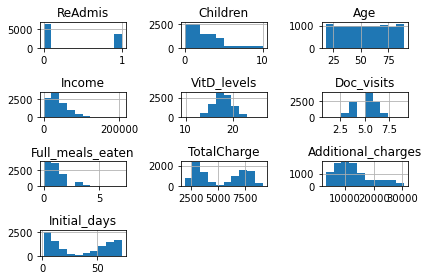

In [13]:
# Histogram of continuous variables
medical_df[['ReAdmis','Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 
          'Full_meals_eaten', 'TotalCharge', 'Additional_charges', 'Initial_days']].hist()
plt.savefig('medical_pyplot.jpg')
plt.tight_layout()

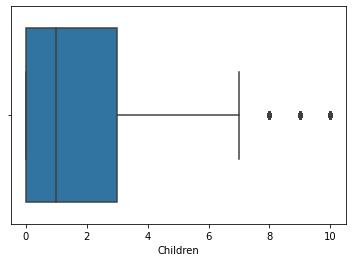

In [14]:
# Seaborn boxplots for continuous variables
sns.boxplot('Children', data = medical_df)
plt.show()

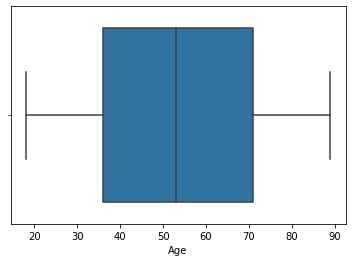

In [15]:
sns.boxplot('Age', data = medical_df)
plt.show()

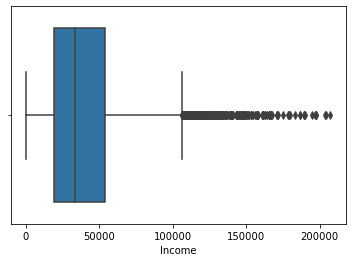

In [16]:
sns.boxplot('Income', data = medical_df)
plt.show()

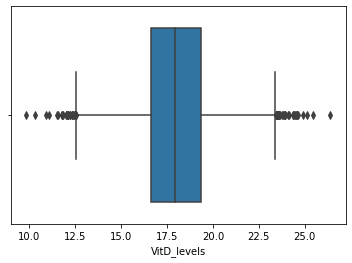

In [17]:
sns.boxplot('VitD_levels', data = medical_df)
plt.show()

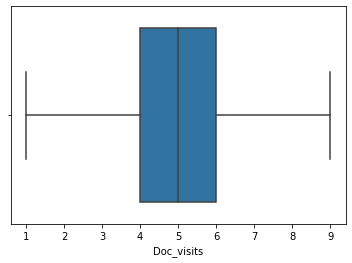

In [18]:
sns.boxplot('Doc_visits', data = medical_df)
plt.show()

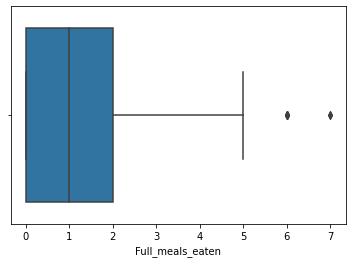

In [19]:
sns.boxplot('Full_meals_eaten', data = medical_df)
plt.show()

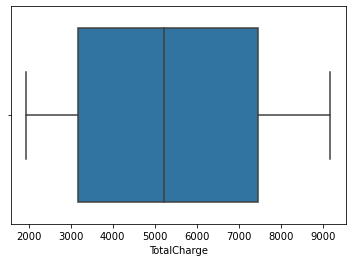

In [20]:
sns.boxplot('TotalCharge', data = medical_df)
plt.show()

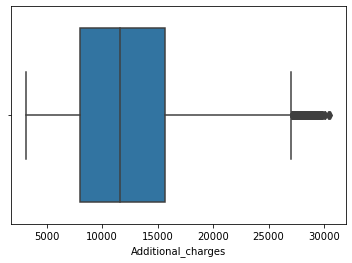

In [21]:
sns.boxplot('Additional_charges', data = medical_df)
plt.show()

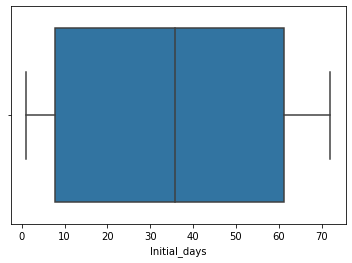

In [22]:
sns.boxplot('Initial_days', data = medical_df)
plt.show()

In [23]:
# The remaining outliers are justifiable and do not need to be removed

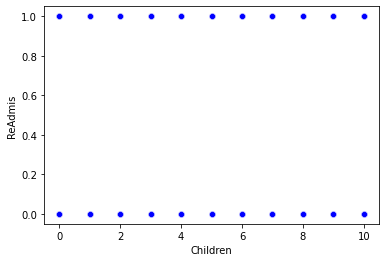

In [24]:
# Scatterplots to show relationships between target and independant variables
sns.scatterplot(x=medical_df['Children'], y=medical_df['ReAdmis'], color='blue')
plt.show();

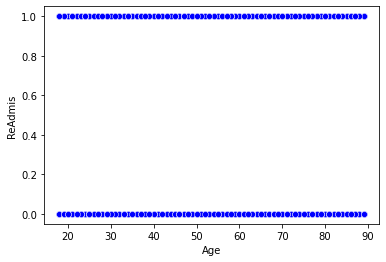

In [25]:
sns.scatterplot(x=medical_df['Age'], y=medical_df['ReAdmis'], color='blue')
plt.show();

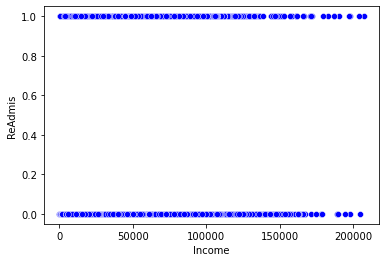

In [26]:
sns.scatterplot(x=medical_df['Income'], y=medical_df['ReAdmis'], color='blue')
plt.show();

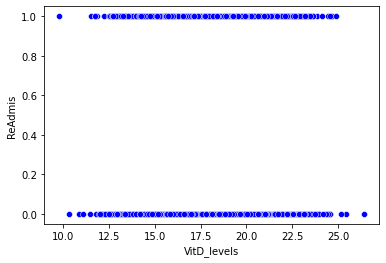

In [27]:
sns.scatterplot(x=medical_df['VitD_levels'], y=medical_df['ReAdmis'], color='blue')
plt.show();

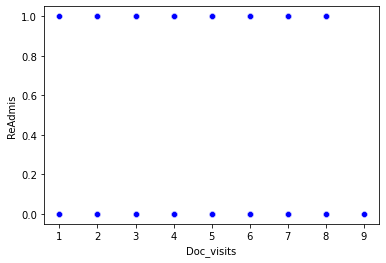

In [28]:
sns.scatterplot(x=medical_df['Doc_visits'], y=medical_df['ReAdmis'], color='blue')
plt.show();

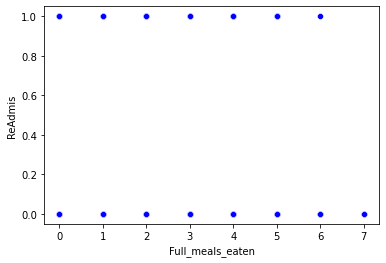

In [29]:
sns.scatterplot(x=medical_df['Full_meals_eaten'], y=medical_df['ReAdmis'], color='blue')
plt.show();

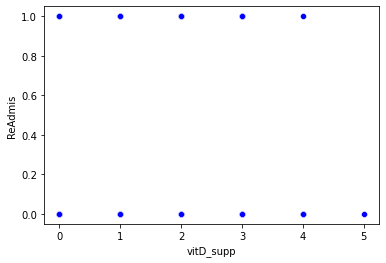

In [30]:
sns.scatterplot(x=medical_df['vitD_supp'], y=medical_df['ReAdmis'], color='blue')
plt.show();

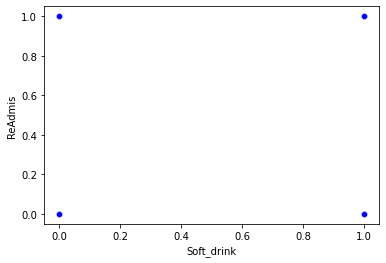

In [31]:
sns.scatterplot(x=medical_df['Soft_drink'], y=medical_df['ReAdmis'], color='blue')
plt.show();

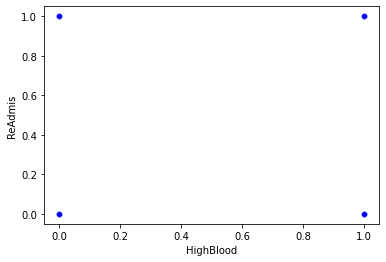

In [32]:
sns.scatterplot(x=medical_df['HighBlood'], y=medical_df['ReAdmis'], color='blue')
plt.show();

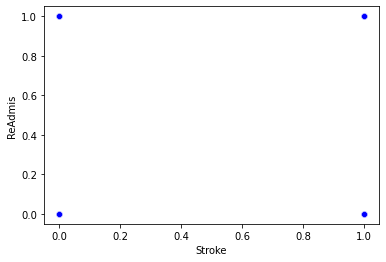

In [33]:
sns.scatterplot(x=medical_df['Stroke'], y=medical_df['ReAdmis'], color='blue')
plt.show();

In [34]:
#sns.scatterplot(x=medical_df['Complication_risk'], y=medical_df['ReAdmis'], color='blue')
#plt.show();

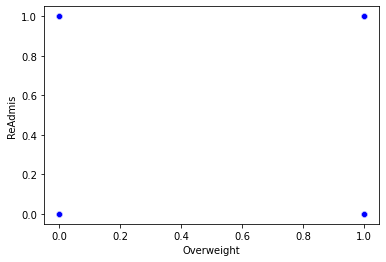

In [35]:
sns.scatterplot(x=medical_df['Overweight'], y=medical_df['ReAdmis'], color='blue')
plt.show();

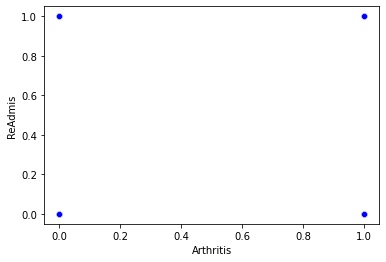

In [36]:
sns.scatterplot(x=medical_df['Arthritis'], y=medical_df['ReAdmis'], color='blue')
plt.show();

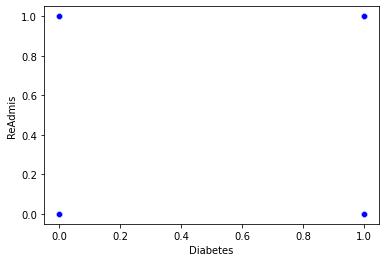

In [37]:
sns.scatterplot(x=medical_df['Diabetes'], y=medical_df['ReAdmis'], color='blue')
plt.show();

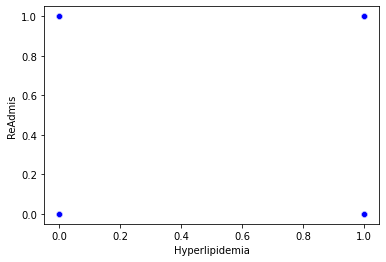

In [38]:
sns.scatterplot(x=medical_df['Hyperlipidemia'], y=medical_df['ReAdmis'], color='blue')
plt.show();

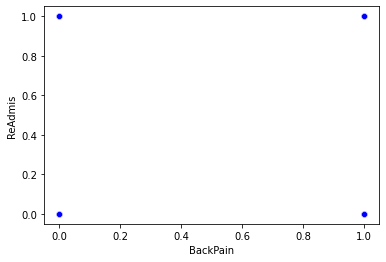

In [39]:
sns.scatterplot(x=medical_df['BackPain'], y=medical_df['ReAdmis'], color='blue')
plt.show();

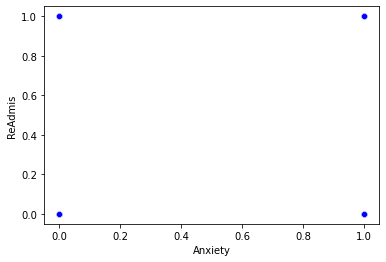

In [40]:
sns.scatterplot(x=medical_df['Anxiety'], y=medical_df['ReAdmis'], color='blue')
plt.show();

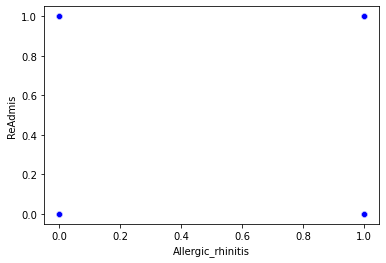

In [41]:
sns.scatterplot(x=medical_df['Allergic_rhinitis'], y=medical_df['ReAdmis'], color='blue')
plt.show();

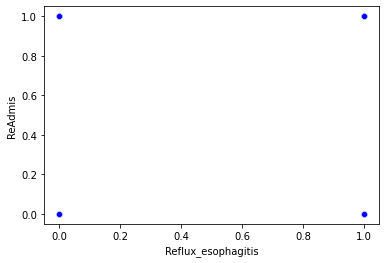

In [42]:
sns.scatterplot(x=medical_df['Reflux_esophagitis'], y=medical_df['ReAdmis'], color='blue')
plt.show();

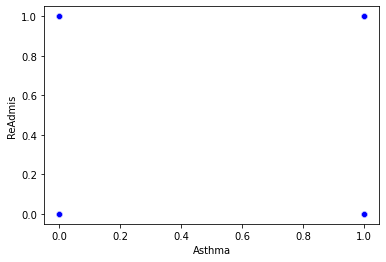

In [43]:
sns.scatterplot(x=medical_df['Asthma'], y=medical_df['ReAdmis'], color='blue')
plt.show();

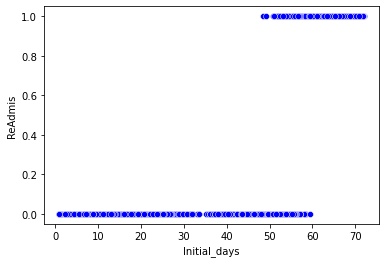

In [44]:
sns.scatterplot(x=medical_df['Initial_days'], y=medical_df['ReAdmis'], color='blue')
plt.show();

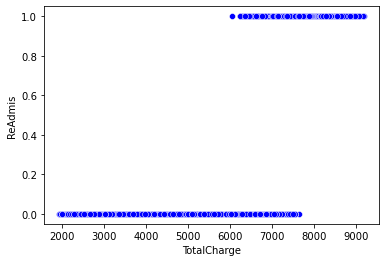

In [45]:
sns.scatterplot(x=medical_df['TotalCharge'], y=medical_df['ReAdmis'], color='blue')
plt.show();

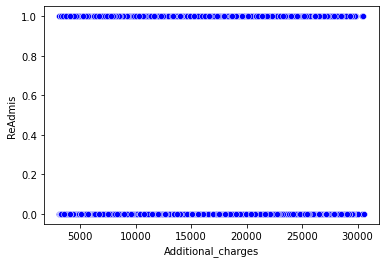

In [46]:
sns.scatterplot(x=medical_df['Additional_charges'], y=medical_df['ReAdmis'], color='blue')
plt.show();

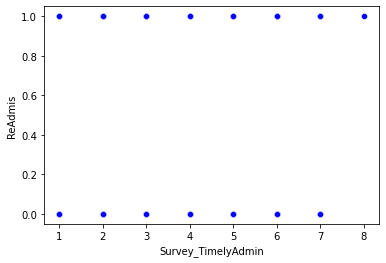

In [47]:
sns.scatterplot(x=medical_df['Survey_TimelyAdmin'], y=medical_df['ReAdmis'], color='blue')
plt.show();

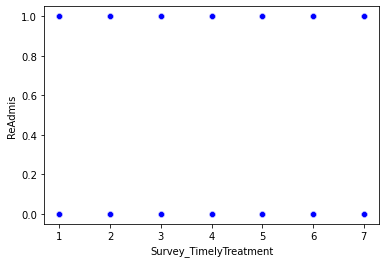

In [48]:
sns.scatterplot(x=medical_df['Survey_TimelyTreatment'], y=medical_df['ReAdmis'], color='blue')
plt.show();

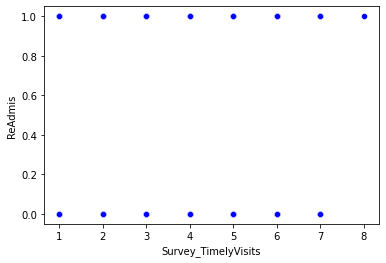

In [49]:
sns.scatterplot(x=medical_df['Survey_TimelyVisits'], y=medical_df['ReAdmis'], color='blue')
plt.show();

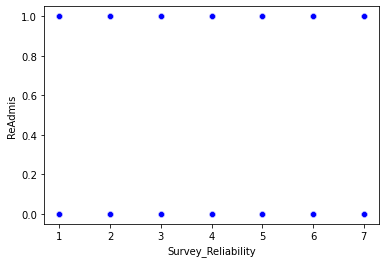

In [50]:
sns.scatterplot(x=medical_df['Survey_Reliability'], y=medical_df['ReAdmis'], color='blue')
plt.show();

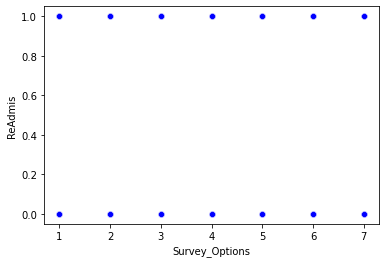

In [51]:
sns.scatterplot(x=medical_df['Survey_Options'], y=medical_df['ReAdmis'], color='blue')
plt.show();

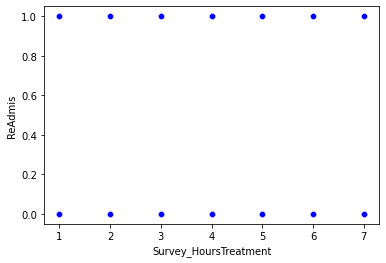

In [52]:
sns.scatterplot(x=medical_df['Survey_HoursTreatment'], y=medical_df['ReAdmis'], color='blue')
plt.show();

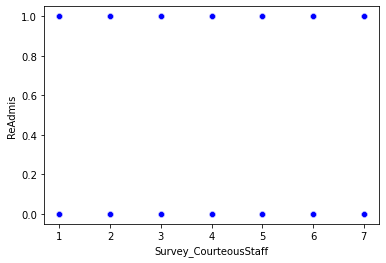

In [53]:
sns.scatterplot(x=medical_df['Survey_CourteousStaff'], y=medical_df['ReAdmis'], color='blue')
plt.show();

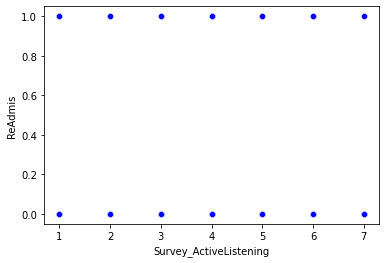

In [54]:
sns.scatterplot(x=medical_df['Survey_ActiveListening'], y=medical_df['ReAdmis'], color='blue')
plt.show();

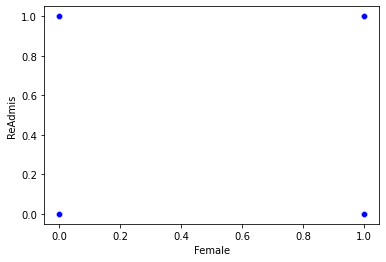

In [55]:
sns.scatterplot(x=medical_df['Female'], y=medical_df['ReAdmis'], color='blue')
plt.show();

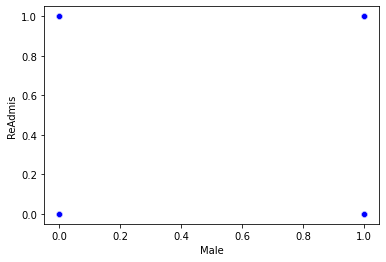

In [56]:
sns.scatterplot(x=medical_df['Male'], y=medical_df['ReAdmis'], color='blue')
plt.show();

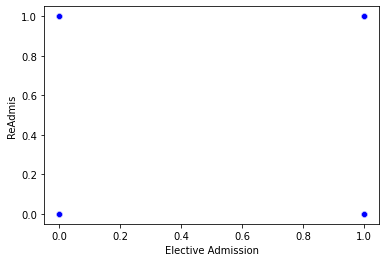

In [57]:
sns.scatterplot(x=medical_df['Elective Admission'], y=medical_df['ReAdmis'], color='blue')
plt.show();

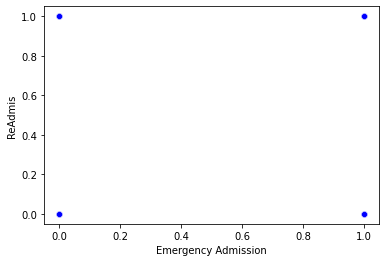

In [58]:
sns.scatterplot(x=medical_df['Emergency Admission'], y=medical_df['ReAdmis'], color='blue')
plt.show();

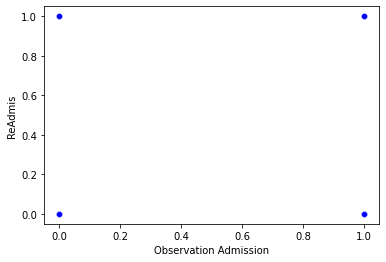

In [59]:
sns.scatterplot(x=medical_df['Observation Admission'], y=medical_df['ReAdmis'], color='blue')
plt.show();

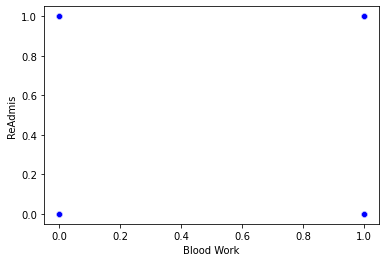

In [60]:
sns.scatterplot(x=medical_df['Blood Work'], y=medical_df['ReAdmis'], color='blue')
plt.show();

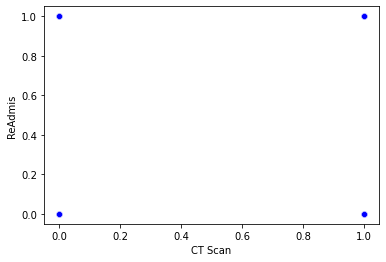

In [61]:
sns.scatterplot(x=medical_df['CT Scan'], y=medical_df['ReAdmis'], color='blue')
plt.show();

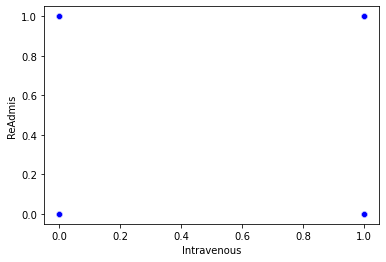

In [62]:
sns.scatterplot(x=medical_df['Intravenous'], y=medical_df['ReAdmis'], color='blue')
plt.show();

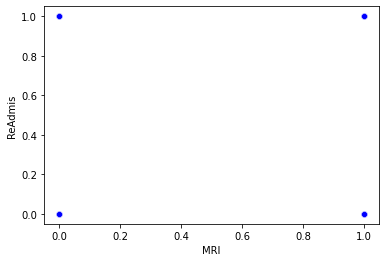

In [63]:
sns.scatterplot(x=medical_df['MRI'], y=medical_df['ReAdmis'], color='blue')
plt.show();

In [64]:
# Extract Clean dataset
medical_df.to_csv('medical_prepared_log.csv')

medical_df.columns

Index(['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'HighBlood', 'Stroke',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Initial_days', 'TotalCharge', 'Additional_charges',
       'Survey_TimelyAdmin', 'Survey_TimelyTreatment', 'Survey_TimelyVisits',
       'Survey_Reliability', 'Survey_Options', 'Survey_HoursTreatment',
       'Survey_CourteousStaff', 'Survey_ActiveListening', 'Female', 'Male',
       'Elective Admission', 'Emergency Admission', 'Observation Admission',
       'High', 'Low', 'Medium', 'Blood Work', 'CT Scan', 'Intravenous', 'MRI',
       'ReAdmis'],
      dtype='object')

In [65]:
# Initial estimated regression equation that could be used to predict the probability of ReAdmis, given the only 
# non-binary original variables
medical_df['intercept'] = 1
medical_df = pd.get_dummies(medical_df, drop_first = True)
ReAdmis_logit_model = sm.Logit(medical_df['ReAdmis'], medical_df[['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 
          'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges', 'Survey_TimelyAdmin',
        'Survey_TimelyTreatment', 'Survey_TimelyVisits', 'Survey_Reliability', 'Survey_Options', 'Survey_HoursTreatment',
        'Survey_CourteousStaff', 'Survey_ActiveListening', 'intercept']]).fit()
print(ReAdmis_logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.044286
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9981
Method:                           MLE   Df Model:                           18
Date:                Sun, 20 Feb 2022   Pseudo R-squ.:                  0.9326
Time:                        21:48:56   Log-Likelihood:                -442.86
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Children                   0.0558      0.039      1.425      0.154      -0.021     

In [66]:
medical_df_dummies = medical_df.columns
print(medical_df_dummies)

Index(['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'HighBlood', 'Stroke',
       'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma',
       'Initial_days', 'TotalCharge', 'Additional_charges',
       'Survey_TimelyAdmin', 'Survey_TimelyTreatment', 'Survey_TimelyVisits',
       'Survey_Reliability', 'Survey_Options', 'Survey_HoursTreatment',
       'Survey_CourteousStaff', 'Survey_ActiveListening', 'Female', 'Male',
       'Elective Admission', 'Emergency Admission', 'Observation Admission',
       'High', 'Low', 'Medium', 'Blood Work', 'CT Scan', 'Intravenous', 'MRI',
       'ReAdmis', 'intercept'],
      dtype='object')


In [67]:
# Model including dummy variables
medical_df['intercept'] = 1
medical_df = pd.get_dummies(medical_df, drop_first = True)
ReAdmis_logit_model = sm.Logit(medical_df['ReAdmis'], medical_df[['Children', 'Age', 'Income', 'VitD_levels', 
        'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges', 
        'Survey_TimelyAdmin', 'Survey_TimelyTreatment', 'Survey_TimelyVisits', 'Survey_Reliability', 'Survey_Options',
        'Survey_HoursTreatment','Survey_CourteousStaff', 'Survey_ActiveListening','Female', 'Male',
        'Elective Admission', 'Emergency Admission', 'Observation Admission', 'Blood Work', 'CT Scan', 'Intravenous', 
        'MRI','High', 'Low', 'Medium', 'intercept']]).fit()
print(ReAdmis_logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.038911
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9972
Method:                           MLE   Df Model:                           27
Date:                Sun, 20 Feb 2022   Pseudo R-squ.:                  0.9408
Time:                        21:48:56   Log-Likelihood:                -389.11
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Children                   0.0701      0.042      1.662      0.097      -0.013     

In [68]:
# Reduced multiple regression model
medical_df['intercept'] = 1
ReAdmis_logit_model_reduced = sm.Logit(medical_df['ReAdmis'], medical_df[['Age','Initial_days', 'TotalCharge', 
                                                            'Additional_charges', 'Survey_TimelyTreatment', 
                                                            'Survey_ActiveListening', 'intercept']]).fit()
print(ReAdmis_logit_model_reduced.summary())

Optimization terminated successfully.
         Current function value: 0.044611
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Sun, 20 Feb 2022   Pseudo R-squ.:                  0.9321
Time:                        21:48:56   Log-Likelihood:                -446.11
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Age                       -0.0124      0.006     -2.054      0.040      -0.024     

In [69]:
# Confusion Matrix
# Import the prepared dataset
dataset = pd.read_csv('medical_prepared_log.csv')
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:, -1].values

In [70]:
# Split the dataset into the training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [71]:
# Training the Logistic Regression model on the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [72]:
# Predict the test set results
y_predict = classifier.predict(x_test)

In [73]:
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[1179   83]
 [  42  696]]


In [74]:
# Compute the accuracy with k-Fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 94.89 %
Standard Deviation: 0.87 %


<AxesSubplot:>

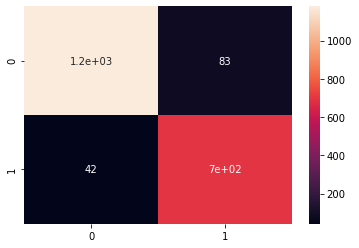

In [75]:
y_predict_test = classifier.predict(x_test)
cm2 = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm2, annot=True)

In [76]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1262
           1       0.89      0.94      0.92       738

    accuracy                           0.94      2000
   macro avg       0.93      0.94      0.93      2000
weighted avg       0.94      0.94      0.94      2000

